<a href="https://colab.research.google.com/github/Lindz11/loan-decisiontree-regression/blob/main/DecisionTreeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
loans = pd.read_csv('loan_data.csv')
loans.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


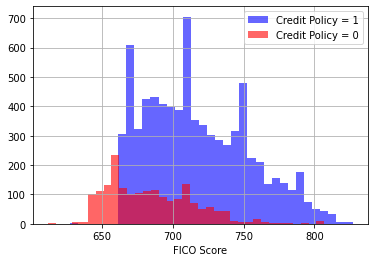

In [ ]:
loans[loans['credit.policy'] == 1]['fico'].hist(bins = 35, color = 'blue', label = 'Credit Policy = 1', alpha = 0.6)
loans[loans['credit.policy'] == 0]['fico'].hist(bins = 35, color = 'red', label = 'Credit Policy = 0', alpha = 0.6)
plt.xlabel('FICO Score')
plt.legend()

From this histogram we can see that there is a cut off of lending money to anyone with a credit score less than about 660 - 670. Also our dataset has way more people that were approved instead of people that were unapproved for the credit loan. 

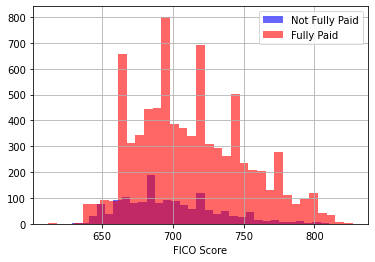

In [ ]:
loans[loans['not.fully.paid'] == 1]['fico'].hist(bins = 35, color = 'blue', label = 'Not Fully Paid', alpha = 0.6)
loans[loans['not.fully.paid'] == 0]['fico'].hist(bins = 35, color = 'red', label = 'Fully Paid', alpha = 0.6)
plt.xlabel('FICO Score')
plt.legend()

From this I can see that we have way more people that are able to fully pay off there loans in this dataset than people who are not able to fully pay off their loans. Also people that are not able to pay off there loans are found mostly between the 650 - 725 FICO Score range. 

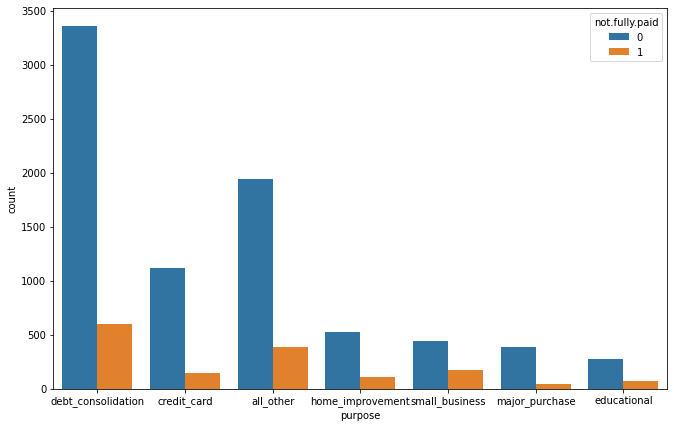

In [ ]:
plt.figure(figsize = (11,7))
sns.countplot(x = 'purpose', data = loans, hue = 'not.fully.paid')

From this we can see how a lot of the people who get loans have a purpose for the loan in consolidating their debt. We can see how decisions like debt consolidation along with credit card approval might be huge decisions for our model going forward.

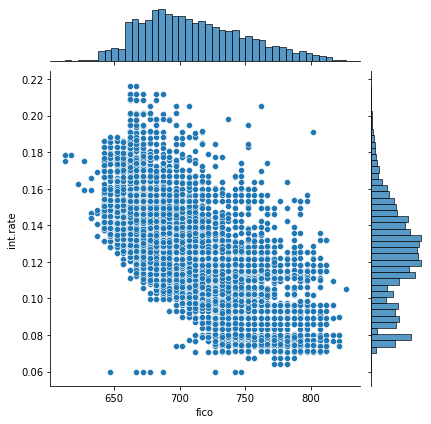

In [ ]:
sns.jointplot(x = 'fico', y = 'int.rate',data = loans)

<Figure size 792x504 with 0 Axes>

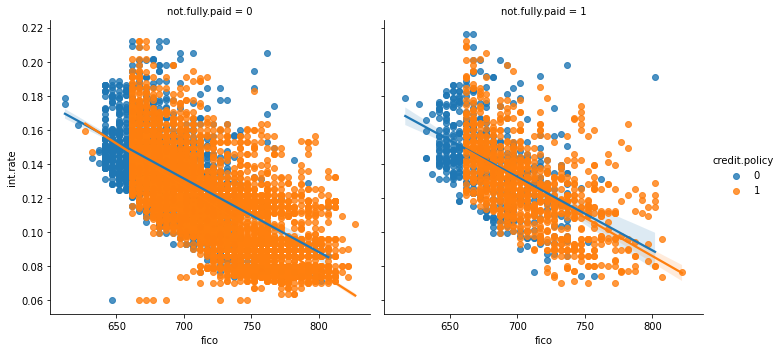

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(x = 'fico', y = 'int.rate', col = 'not.fully.paid' , hue = 'credit.policy', data = loans)